# Introduction to Keras and Tensorflow

This notebook will be an introduction to working with neural networks using the Keras API to interact with Tensorflow.

It will cover:

1. [Visual Introduction](#visual)

2. [Sequential Models](#sequential)

3. [Functional Models](#functional)

In [1]:
# Standard Stuff
import numpy as np 
import pandas as pd

# Keras Stuff
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import SGD, Adadelta 
from keras.callbacks import Callback
from keras import backend as K

# Datasets Stuff
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold

# Modelling and Metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve,
                             f1_score, auc, average_precision_score, matthews_corrcoef, recall_score, precision_score)
from sklearn.model_selection import KFold
from sklearn.utils import resample

# Plotting Stuff
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Stop printing F1 Score Warnings pls
import warnings
warnings.simplefilter('ignore')

# Other
from time import time

Using TensorFlow backend.


<a id='visual'></a>

---
---
---
# Visual Introduction

Let's look at a basic intro to doing a fit using Keras on 2D data that we can visualize.

In [32]:
display(x.shape)
y.shape

(400, 3)

(600, 3)

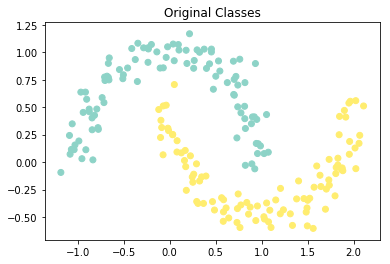

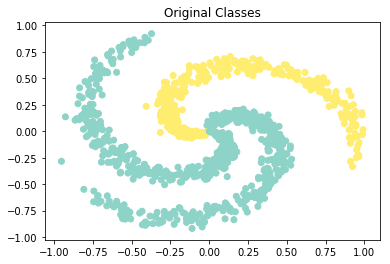

In [121]:
# Random data sets
from sklearn.datasets import make_blobs, make_moons, make_circles

n_data = 200
x,y = make_moons(n_data, noise=.1)
y = keras.utils.to_categorical(y, num_classes=2) 

plt.scatter(x[:,0],x[:,1],c=y[:,1].ravel(),cmap=plt.cm.Set3)
plt.title('Original Classes')
plt.show()

def twospirals(n_points,K=3, noise=.5):
    """
     Returns the K spirals dataset.
    """
    D = 2
    N = n_points
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    return (X,y)

x,y = twospirals(350)
y = keras.utils.to_categorical(y, num_classes=3) 
plt.scatter(x[:,0],x[:,1],c=y[:,1].ravel(),cmap=plt.cm.Set3)
plt.title('Original Classes')
plt.show()

## Fit Data using Keras

For this simple visual example, we use the Sequential class. This allows us to build traditional, fully connected neural networks by simply 'adding layers' to the model. 

Main layer type used is **Dense**

* First layer requires an input_dim, the rest are inferred. 
* Each layer requires some sort of activation. Common options are relu, tanh, sigmoid. For the output, softmax is often used.

An **optimizer** must be built as well. There are many options available in the Keras documentation. 

* Common options are SGD, Adam, Adagrad, ... 

Next we need to **compile** the model. This involves setting up the loss function, optimizer, and any extra metrics you wish to monitor during training. 

* Standard loss for classification is categorical_crossentropy
* Standard loss for regression is mean_squared_error
* Metrics may include accuracy, mse, etc, or custom metrics that take as input the true and predicted values

Finally we can **fit** the model, specifying number of epochs and batch size. 

In [124]:
model = Sequential() 

# Dense(64) is a fully-connected layer with 64 hidden units. 
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors. 

model.add(Dense(100, activation='relu', input_dim=x.shape[1])) 
model.add(Dense(100, activation='relu')) 
model.add(Dense(100, activation='relu')) 
model.add(Dense(100, activation='relu')) 
model.add(Dense(100, activation='relu')) 
model.add(Dense(y.shape[1], activation='softmax')) 

sgd = SGD(lr=0.01)#, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 
history = model.fit(x, y, epochs=100, batch_size=10) 

Epoch 1/100
1050/1050 [==============================] - 1s 1ms/step - loss: 1.0902 - acc: 0.4886
Epoch 2/100
1050/1050 [==============================] - 0s 296us/step - loss: 1.0692 - acc: 0.5952
Epoch 3/100
1050/1050 [==============================] - 0s 299us/step - loss: 1.0452 - acc: 0.6305
Epoch 4/100
1050/1050 [==============================] - 0s 293us/step - loss: 1.0133 - acc: 0.6514
Epoch 5/100
1050/1050 [==============================] - 0s 293us/step - loss: 0.9697 - acc: 0.6295
Epoch 6/100
1050/1050 [==============================] - 0s 301us/step - loss: 0.9125 - acc: 0.6429
Epoch 7/100
1050/1050 [==============================] - 0s 307us/step - loss: 0.8453 - acc: 0.6514
Epoch 8/100
1050/1050 [==============================] - 0s 315us/step - loss: 0.7684 - acc: 0.6800
Epoch 9/100
1050/1050 [==============================] - 0s 300us/step - loss: 0.6880 - acc: 0.6933
Epoch 10/100
1050/1050 [==============================] - 0s 306us/step - loss: 0.6097 - acc: 0.7314
E

1050/1050 [==============================] - 0s 302us/step - loss: 0.0428 - acc: 0.9829
Epoch 82/100
1050/1050 [==============================] - 0s 288us/step - loss: 0.0486 - acc: 0.9829
Epoch 83/100
1050/1050 [==============================] - 0s 285us/step - loss: 0.0358 - acc: 0.9838
Epoch 84/100
1050/1050 [==============================] - 0s 299us/step - loss: 0.0342 - acc: 0.9819
Epoch 85/100
1050/1050 [==============================] - 0s 283us/step - loss: 0.0416 - acc: 0.9848
Epoch 86/100
1050/1050 [==============================] - 0s 281us/step - loss: 0.0346 - acc: 0.9876
Epoch 87/100
1050/1050 [==============================] - 0s 289us/step - loss: 0.0394 - acc: 0.9819
Epoch 88/100
1050/1050 [==============================] - 0s 289us/step - loss: 0.0302 - acc: 0.9876
Epoch 89/100
1050/1050 [==============================] - 0s 290us/step - loss: 0.0293 - acc: 0.9886
Epoch 90/100
1050/1050 [==============================] - 0s 288us/step - loss: 0.0365 - acc: 0.9848
Epo

## Visualize Outputs

Let's check out the output from this run. We will build a plot that has the background color representing the class that it would most likely be labeled as.

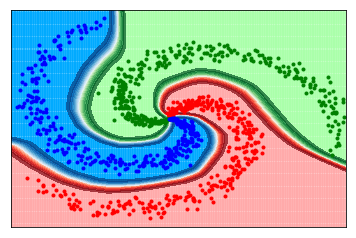

In [125]:
#x_new1 = np.arange(-10.1,10.1,0.1)
#x_new2 = np.arange(-10.1,10.1,0.1)
#x_new1 = np.arange(-1.1,2.2,0.01)
#x_new2 = np.arange(-0.7,1.4,0.01)
x_new1 = np.arange(-1.01,1.01,0.01)
x_new2 = np.arange(-1.01,1.01,0.01)
n_x1 = x_new1.shape[0]
n_x2 = x_new2.shape[0]
xx,yy = np.meshgrid(x_new1,x_new2)

x_test = np.empty((n_x1*n_x2,2))
for ii,x1 in enumerate(x_new1):
    for jj,x2 in enumerate(x_new2):
        x_test[ii*n_x2+jj,0] = x1
        x_test[ii*n_x2+jj,1] = x2
        
y_test = model.predict(x_test)[:,1]
y_test = np.argmax(model.predict(x_test),1)
y_prob = model.predict(x_test)
y_prob0 = y_prob[:,0].reshape(n_x1,n_x2).T
y_prob1 = y_prob[:,1].reshape(n_x1,n_x2).T
y_prob2 = y_prob[:,2].reshape(n_x1,n_x2).T
y_test = y_test.reshape(n_x1,n_x2).T

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
#plt.pcolormesh(xx,yy,y_test,cmap = 'coolwarm')
#plt.scatter(x[:,0], x[:,1], c = y[:,1].ravel(),s = 100,marker = 'x',vmin = 0, vmax = 1,cmap=plt.cm.Set3)
#plt.pcolormesh(xx,yy,y_test,cmap=cmap_light)

# decision regions
plt.pcolormesh(xx, yy, y_test, cmap=cmap_light, alpha = 0.7)

# probability contours
levels=np.arange(0.5,1,0.05)
plt.contourf(xx, yy, y_prob0, levels=levels, cmap='Reds', alpha=0.7)
plt.contourf(xx, yy, y_prob1, levels=levels, cmap='Greens', alpha=0.7)
plt.contourf(xx, yy, y_prob2, levels=levels, cmap='Blues', alpha=0.7)

# actual data
plt.scatter(x[y[:,0]==1,0],x[y[:,0]==1,1],c='r',marker='.')
plt.scatter(x[y[:,1]==1,0],x[y[:,1]==1,1],c='g',marker='.')
plt.scatter(x[y[:,2]==1,0],x[y[:,2]==1,1],c='b',marker='.')

#plt.xlim([-1.1,2.1])
#plt.ylim([-0.7,1.3])
#plt.xlim([-10.1,10.1])
#plt.ylim([-10.1,10.1])
plt.xlim([-0.9,1.0])
plt.ylim([-1.0,1.0])

plt.xticks([])
plt.yticks([])
plt.savefig('../Images/Spiral_Classified.png',bbox_inches='tight')
plt.show()

In [98]:
?plt.savefig

<a id='sequential'></a>

---
---
---
# Keras Sequential: More Details

Let's dive into the details a bit further. First let's define some helper functions we can use to visualize the various metrics that Keras will provide. 

An import helper function here is the **CallbackMetrics** class, which will save extra metrics outside of the ones specified during compile. Here we've defined a callbacks class that will track some other standard classification metrics that Keras doesn't automatically follow (F1 score, Precision and Recall)

In [5]:
# Helper functions and classes 
def plot_history(history,validation=True):
    """
    Plot the history that model.fit() will produce
    If you didn't include validation data, set validation flag to false
    """
    fig,ax = plt.subplots()
    if validation:
        plt.plot(history.history['val_loss'], c='b', linestyle='-', label='Validation Loss')
    plt.plot(history.history['loss'], c='b' ,linestyle='--', label='Training Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower left')
    
    ax2 = ax.twinx()
    if validation:
        ax2.plot(history.history['val_acc'], c='r', linestyle='-',label='Validation Accuracy')
    ax2.plot(history.history['acc'], c='r', linestyle='--', label='Training Accuracy')
    ax2.set_ylabel('accuracy')
    ax2.legend(loc='upper left')
    plt.show()
    

class CallbackMetrics(Callback):
    """
    Callbacksclass that allows you to save extra metrics not defined in Keras
    Attributes: val_f1s: list of f1 scores
                val_recalls: list of recall scores
                val_precisions: list of precision_scores
    """
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        val_predict = np.argmax(self.model.predict(self.validation_data[0]),axis=1)
        val_targ = np.argmax(self.validation_data[1],axis=1).ravel()
        _val_f1 = f1_score(val_targ, val_predict)
        _val_recall = recall_score(val_targ, val_predict)
        _val_precision = precision_score(val_targ, val_predict)
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print(' — val_f1: %f — val_precision: %f — val_recall %f' %(_val_f1, _val_precision, _val_recall))
        return
    
    def plot_metrics(self):
        plt.plot(self.val_f1s, label="F1 Score")
        plt.plot(self.val_recalls, label = "Recall Score")
        plt.plot(self.val_precisions, label = "Precision Score")
        plt.title('Validation Scores')
        plt.legend()
        plt.show()


class ModelMetrics():
    """
        ModelMetrics class that will provide many different metrics for a given model outputs. 

        Required Parameters:
        y_test = Test Data Classes. Should be either (-1,1) or (0,1).
        y_pred = Predictions for the "probability" of y being in the positive class. Should be in range (-inf,inf)
        y_prob = Test Data Predictions from the model. Should be same format as y_test. 

        Useful functions:
        all_metrics() = returns metrics including: class imbalance, 
                                                   accuracy,
                                                   confusion matrix,
                                                   ROC/AUC,
                                                   Precision/Recall Curve, F1 score, MCC, AUC, Average Precision
        
    """
    
    def __init__(self,y_test,y_pred,y_prob):
        self.y_test = np.array(y_test).reshape(-1)
        self.y_pred = np.array(y_pred).reshape(-1)
        self.y_prob = np.array(y_prob).reshape(-1)
        
    def all_metrics(self):
        print('')
        self.imbalance()
        print('')
        self.accuracy()
        print('')
        self.print_cm()
        print('')
        self.roc_metrics()
        print('')
        self.pr_metrics()
        
    def roc_metrics(self):
        self.roc_plot()
        self.print_auc_roc()
        
    def pr_metrics(self):
        self.plot_pr()
        self.print_f1()
        self.print_mcc()
        self.print_auc_pr()
        self.print_ap()
        
    # Measure Imbalance
    def imbalance(self):
        num_examples = len(self.y_test)
        y_min = min(self.y_test)
        y_max = max(self.y_test) 
        num_neg = np.sum(self.y_test==y_min)
        num_pos = np.sum(self.y_test==y_max)
        print("Number of negative cases = ",num_neg)
        print("Number of positive cases = ",num_pos)
        print('The ratio of Positve to Negative cases is {:0.3f}'.format(num_pos/num_neg))
        
        print('')
        if num_neg/num_pos >= 2:
            print('Number of Negative Classes is quite large. Recommend using the Precision-Recall Metrics.')
        elif num_pos/num_neg >=2:
            print('Number of Positive Classes is quite large. Recommend using the Precision-Recall Metrics.')
        else:
            print('The classes seem balanced. ROC metrics should be acceptable.')
        print('')
    
    # Overall accuracy
    def accuracy(self):
        acc = accuracy_score(self.y_test,self.y_pred)
        print('Overall Accuracy = {:0.3f}'.format(acc))
        return acc
        
    # Confusion Matrix
    def print_cm(self):
        cm = confusion_matrix(self.y_test,self.y_pred)
        true_negative, false_positive, false_negative, true_positive = cm.ravel()
        print('           CONFUSION MATRIX')
        print('                 y_pred')
        print('          {:^10d}{:^10d}'.format(-1,1))
        print('           --------------------')
        print('y_test -1 |{:^10d}{:^10d}|'.format(true_negative,false_positive))
        print('        1 |{:^10d}{:^10d}|'.format(false_negative,true_positive))
        print('           --------------------')
        return cm
        
    # ROC Curve
    def roc_plot(self):
        false_positive_rate, true_positive_rate, thresholds = roc_curve(self.y_test,self.y_prob)
        plt.plot(false_positive_rate,true_positive_rate,'-b',label='Model')
        plt.plot([0,1],[0,1],'-k',label='Guess')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.xlim([-0.02,1.0])
        plt.ylim([0.0,1.02])
        plt.legend()
        plt.show()

    # AUC of ROC
    def print_auc_roc(self):
        auc1 = roc_auc_score(self.y_test,self.y_prob)
        print('AUC = {:0.3f}'.format(auc1))
        return auc1

    ## These next few are more useful for imbalanced classes 

    # Precision - Recall Curve
    def plot_pr(self):
        precision, recall, thresholds = precision_recall_curve(self.y_test, self.y_prob)
        plt.plot(recall,precision,'-b',label='Model')
        plt.plot([0,1],[0.5,0.5],'-k',label='Guess')
        plt.title('Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.xlim([-0.02,1.0])
        plt.ylim([0.0,1.02])
        plt.legend()
        plt.show()

    # F1 Score
    def print_f1(self):
        f1 = f1_score(self.y_test,self.y_pred)
        print("F1 Score = {:0.3f}".format(f1))
        return f1
    
    # Matthews Correlation
    def print_mcc(self):
        mcc = matthews_corrcoef(self.y_test,self.y_pred)
        print("MCC = {:0.3f}".format(mcc))
        return mcc

    # AUC for PR
    def print_auc_pr(self):
        precision, recall, thresholds = precision_recall_curve(self.y_test, self.y_prob)
        auc2 = auc(recall,precision)
        print("AUC for Precision-Recall: {:0.3f}".format(auc2))
        return auc2

    # Average precision
    def print_ap(self):
        average_precision = average_precision_score(self.y_test,self.y_prob)
        print("Average Precision = {:0.3f}".format(average_precision))
        return average_precision

## Import Data

For this portion, we will be using data from [UCI on Banknote Fraud](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#). First we'll import the data, and split it into a training and test set. We'll use an 85/15 split.

We will also transform the data so that the training data lies within the 0.2 to 0.8 range. 

In [6]:
# Import the data we are using. 
# From https://archive.ics.uci.edu/ml/datasets/banknote+authentication# 
cols = ['variance','skewness','curtosis','entropy','class']
df = pd.read_csv('../Data/data_banknote_authentication.txt', header=None)
df.columns = ['variance','skewness','curtosis','entropy','class']
df.head()
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
# Change data to a more friendly numpy array, and split into training and test sets. We use an 85/15 split. 
x = df.drop(['class'],axis=1).values
y = df['class'].values.reshape(-1,1)

# Split into test and train sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)    

# Scale so that train data is all within 0.2 to 0.8 range
scaler = MinMaxScaler(feature_range=(0.2,0.8))
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

## Train the Model

The model we will train will look like this:


<img src="../Images/regular_NN.png" title="Regular Neural Network" width="40%" height="40%" align="left"/>
<BR CLEAR="left">

Let's train our model. We will train it using 5-Folds CV to see how well the model does on unseen data. As far as I can tell, this is not inherently included in Keras, so we wrap an sklearn KFolds method around the calls to Keras. 

For this model, we will include:
* 2 hidden layers
* dropout layer after the second hidden layer to help with overfitting.
* Adadelta optimizer

Parameters that we may play with to achieve the best results include:
* n_hidden
* batch_size
* epochs
* dropout_rate

Note that Keras is smart and saves any metrics you wish to follow as well as performing any callbacks you requested at various points during the run. Standard practice is:
* Metrics are calculated after every epoch (and saved in the fit output.history dictionary)
* Callbacks are calculated when the callback class requests them. In our case, we only ask for callbacks after each epoch as well. They are calculated only for the validation data (although they could be done for the training data as well). 

Let's try a few different runs, looping over different hyperparameters and optimizers. We'll store the results in a dictionary for later visualization. 

When doing multiple loops, you might need to call K.clear_session() to clear the TF graph so that the run isn't too slow. 
* This clears the TF graph being produced in the background.
* Everytime it gets cleared, all variables need to be rewritten (including optimizer, model, etc). 


Finished Model 0. Model time 29.744s. Total time 0.50m
Average Validation Accuracy =  0.948
Average Validation F1 =        0.938
Average Validation Precision = 0.907
Average Validation Recall =    0.973


Finished Model 10. Model time 7.426s. Total time 9.10m
Average Validation Accuracy =  0.628
Average Validation F1 =        0.178
Average Validation Precision = 0.171
Average Validation Recall =    0.185


Finished Model 20. Model time 5.395s. Total time 10.70m
Average Validation Accuracy =  0.511
Average Validation F1 =        0.245
Average Validation Precision = 0.400
Average Validation Recall =    0.176


Finished Model 30. Model time 5.313s. Total time 11.66m
Average Validation Accuracy =  0.534
Average Validation F1 =        0.075
Average Validation Precision = 0.076
Average Validation Recall =    0.074


Finished Model 40. Model time 49.488s. Total time 15.13m
Average Validation Accuracy =  0.978
Average Validation F1 =        0.975
Average Validation Precision = 0.975
Average V

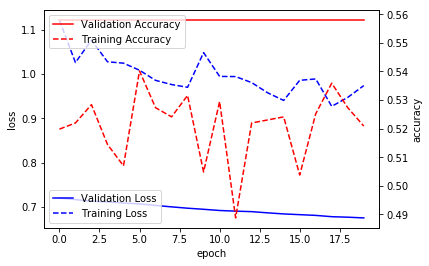

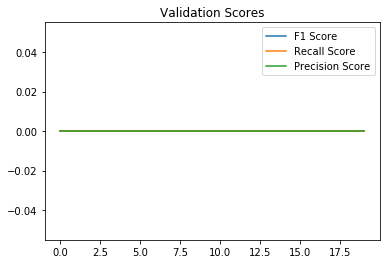

In [10]:
n_input = 4
n_output = 2

n_hidden = 10
batch_size = 10#x_train.shape[0]
epochs = 15
dropout_rate = 0.25

n_hidden_list = [2,5,10]
batch_size_list = [1, 10, 100, x_train.shape[0]]
epochs_list = [5, 10, 20]
dropout_list = [0.25, 0.5, 0.75]

# Keras recommends using the default values for Adadelta
optim1 = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
optim2 = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

optim = optim1

# Dictionary for later
results_dict = {
    'n_hidden':[],
    'batch_size':[],
    'epochs':[],
    'dropout':[],
    'accuracy':[],
    'F1_score':[],
    'precision':[],
    'recall':[]
}

model_num = 0
best_score = 0
best_model = 0
start0 = time()

for n_hidden in n_hidden_list:
    for batch_size in batch_size_list:
        for epochs in epochs_list:
            for dropout_rate in dropout_list:
                
                start = time()
                
                results_dict['n_hidden'].append(n_hidden)
                results_dict['batch_size'].append(batch_size)
                results_dict['epochs'].append(epochs)
                results_dict['dropout'].append(dropout_rate)
                


                skf = StratifiedKFold(5)
                
                optim = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

                score_list = []
                f1_list = []
                prec_list = []
                recall_list = []

                for train_index, val_index in skf.split(x_train, y_train):
                    x_train_k, x_val_k = x_train[train_index], x_train[val_index]
                    y_train_k, y_val_k = y_train[train_index], y_train[val_index]

                    # one hot encode the classes (do here as skf doesn't like the class)
                    y_train_k = keras.utils.to_categorical(y_train_k, num_classes=2)
                    y_val_k = keras.utils.to_categorical(y_val_k, num_classes=2)

                    model = Sequential()

                    cb_metrics = CallbackMetrics()

                    model.add(Dense(n_hidden, activation='sigmoid', input_dim=n_input))
                    model.add(Dense(n_hidden, activation='sigmoid')) 
                    model.add(Dropout(dropout_rate)) 
                    model.add(Dense(n_output, activation='softmax')) 

                    model.compile(loss='categorical_crossentropy', 
                              optimizer=optim, 
                              metrics=['accuracy']) 

                    history = model.fit(x_train_k, y_train_k, 
                              epochs=epochs, 
                              batch_size=batch_size, 
                              validation_data=(x_val_k, y_val_k),
                              callbacks=[cb_metrics],
                              verbose=0) 

                    score = model.evaluate(x_val_k, y_val_k, batch_size=batch_size,verbose=0)
                    score_list.append(score[1])
                    f1_list.append(cb_metrics.val_f1s[-1])
                    prec_list.append(cb_metrics.val_recalls[-1])
                    recall_list.append(cb_metrics.val_precisions[-1])

                results_dict['accuracy'].append(np.mean(score_list))
                results_dict['F1_score'].append(np.mean(f1_list))
                results_dict['precision'].append(np.mean(prec_list))
                results_dict['recall'].append(np.mean(recall_list))

                # Determine best F1 Score
                if np.mean(f1_list)>best_score:
                    best_score = np.mean(f1_list)
                    best_model = model_num

                end = time()

                if model_num%10==0:
                    print()
                    print("Finished Model {:d}. Model time {:0.3f}s. Total time {:0.2f}m".format(model_num,end-start,(end-start0)/60))
                    print('Average Validation Accuracy =  {:0.3f}'.format(np.mean(score_list)))
                    print('Average Validation F1 =        {:0.3f}'.format(np.mean(f1_list)))
                    print('Average Validation Precision = {:0.3f}'.format(np.mean(prec_list)))
                    print('Average Validation Recall =    {:0.3f}'.format(np.mean(recall_list)))
                    print()

                model_num += 1
                K.clear_session()

    

plot_history(history)
cb_metrics.plot_metrics()

In [12]:
print('Best Model: \n')
print(pd.DataFrame(results_dict).iloc[best_model,:])
df = pd.DataFrame(results_dict)
df.to_csv('Keras_Models/keras_sequential_train_results.csv',index=False)
df.head(10)

Best Model: 

n_hidden      10.000000
batch_size     1.000000
epochs        20.000000
dropout        0.250000
accuracy       0.994853
F1_score       0.994193
precision      0.996117
recall         0.992326
Name: 78, dtype: float64


,n_hidden,batch_size,epochs,dropout,accuracy,F1_score,precision,recall
0,2,1,5,0.25,0.947658,0.937852,0.906796,0.973038
1,2,1,5,0.50,0.832035,0.739899,0.619417,1.000000
2,2,1,5,0.75,0.558318,0.000000,0.000000,0.000000
3,2,1,10,0.25,0.976839,0.973609,0.965049,0.982463
4,2,1,10,0.50,0.918638,0.889615,0.834951,0.979921
5,2,1,10,0.75,0.757459,0.514391,0.452427,0.597500
6,2,1,20,0.25,0.983706,0.981605,0.984466,0.978771
7,2,1,20,0.50,0.982847,0.980571,0.980583,0.980691
8,2,1,20,0.75,0.943399,0.932100,0.883495,0.987699
9,2,10,5,0.25,0.812993,0.670562,0.582524,0.793023


## Training Results

We see that, even with very few adjustments to the hyperparameters, we already achieve extremely high validation accuracy. 

Let's pick the model with the best validation scores and use that to train a final model (on all the training data) that we can then test and report final results on the hold-out data. 

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x000001F7AFB2C278>>
Traceback (most recent call last):
  File "C:\Users\Aron\Anaconda3\envs\datascience\lib\site-packages\tensorflow\python\client\session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "C:\Users\Aron\Anaconda3\envs\datascience\lib\site-packages\tensorflow\python\framework\errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 2163088883784


Final Test Accuracy =  0.985
Final Test F1 =        0.984
Final Test Precision = 0.989
Final Test Recall =    0.979


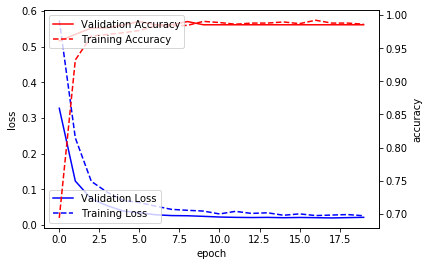

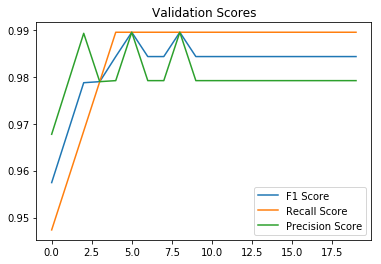

In [28]:
# Final Model: use all the training data with whatever parameters performed best during k-folds CV
K.clear_session()

n_input = 4
n_output = 2

n_hidden_best = results_dict['n_hidden'][best_model]
batch_size_best = results_dict['batch_size'][best_model]
epochs_best = results_dict['epochs'][best_model]
dropout_rate_best = results_dict['dropout'][best_model]

optim_best = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

# one hot encode the classes
y_train_ohe = keras.utils.to_categorical(y_train, num_classes=2)
y_test_ohe = keras.utils.to_categorical(y_test, num_classes=2)

cb_metrics = CallbackMetrics()

model_seq = Sequential()

model_seq.add(Dense(n_hidden_best, activation='sigmoid', input_dim=n_input))
model_seq.add(Dense(n_hidden_best, activation='sigmoid')) 
model_seq.add(Dropout(dropout_rate_best)) 
model_seq.add(Dense(n_output, activation='softmax')) 

model_seq.compile(loss='categorical_crossentropy', 
          optimizer=optim_best, 
          metrics=['accuracy']) 

history = model_seq.fit(x_train, y_train_ohe, 
          epochs=epochs_best, 
          batch_size=batch_size_best, 
          callbacks = [cb_metrics],
          validation_data=(x_test, y_test_ohe),
          verbose=0) 

score = model_seq.evaluate(x_test, y_test_ohe, batch_size=batch_size,verbose=0)
print('Final Test Accuracy =  {:0.3f}'.format(score[1]))
print('Final Test F1 =        {:0.3f}'.format(cb_metrics.val_f1s[-1]))
print('Final Test Precision = {:0.3f}'.format(cb_metrics.val_recalls[-1]))
print('Final Test Recall =    {:0.3f}'.format(cb_metrics.val_precisions[-1]))

plot_history(history, validation=True)
cb_metrics.plot_metrics()


Number of negative cases =  111
Number of positive cases =  95
The ratio of Positve to Negative cases is 0.856

The classes seem balanced. ROC metrics should be acceptable.


Overall Accuracy = 0.985

           CONFUSION MATRIX
                 y_pred
              -1        1     
           --------------------
y_test -1 |   109        2     |
        1 |    1         94    |
           --------------------



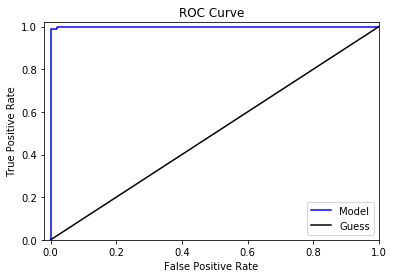

AUC = 1.000



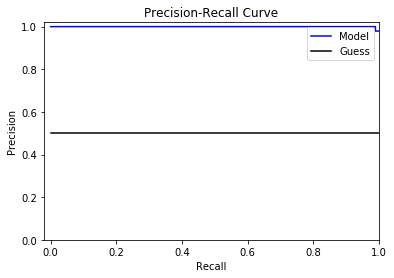

F1 Score = 0.984
MCC = 0.971
AUC for Precision-Recall: 1.000
Average Precision = 1.000


In [50]:
y_prob = model_seq.predict(x_test)
y_pred = np.argmax(y_prob,axis=1).reshape(-1,1)
y_prob = y_prob[:,1]
metrics = ModelMetrics(y_test, y_pred, y_prob)
metrics.all_metrics()

## Final Results

The final results on the test data are good: we've actually ended up with a nearly perfect confusion matrix on the hold-out test data.

<a id='functional'></a>

---
---
---
# Keras: Functional Model

Within the functional model, we can build up more complicated networks than the simple structure allowed in Sequential nets. Here, we essentially build up models layer by layer by passing tensors through different layer types that we control. We can thus control the sequence of activations/layers/weights/ etc applied to the model. For example, a layer can be saved and passed to multiple different upstream layers, something that is not possible within the sequential model. 

One type of NN that this comes in handy for is the Residual Neural Network, schematically depicted below.

<img src="../Images/res_NN.png" title="Residual Neural Network" width="40%" height="40%" align="left"/>
<BR CLEAR="left">
    

Here you can "skip" over layers to help avoid the vanishing gradient problem. Let's apply this to the model we made above in the Keras functional model framework.

We need a few extra Keras packages: 

* Model contains this functional framework.
* Input is needed for the initial loading into a tensor. 
* layers.add is needed to add two layers together.

In [15]:
# Import some extra functional packages (in particular, we need Input and Model)
from keras.layers import Input, Activation
from keras.models import Model
from keras import layers

Final Test Accuracy =  0.995
Final Test F1 =        0.995
Final Test Precision = 1.000
Final Test Recall =    0.990


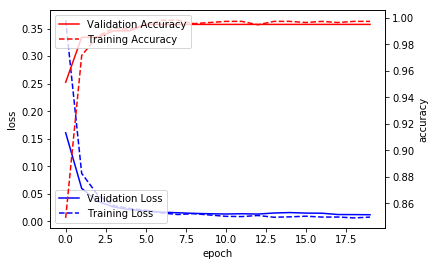

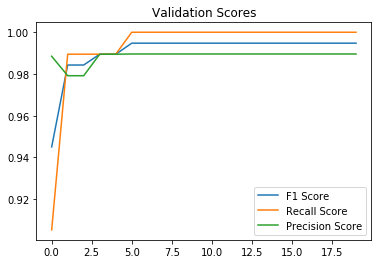

In [30]:
# Build the model
# K.clear_session() (don't clear it quite yet, need to save the old model first)

n_input = 4
n_output = 2

n_hidden = results_dict['n_hidden'][best_model]
batch_size = results_dict['batch_size'][best_model]
epochs = results_dict['epochs'][best_model]
dropout_rate = results_dict['dropout'][best_model]

optim = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

# one hot encode the classes
y_train_ohe = keras.utils.to_categorical(y_train, num_classes=2)
y_test_ohe = keras.utils.to_categorical(y_test, num_classes=2)

cb_metrics = CallbackMetrics()

# Build it up!

# First the input
inputs = Input(shape=(n_input,))

# Next the first few original layers
# Let's do the activations as their own layers to make this more clear

hidden1 = Dense(n_hidden)(inputs)
active1 = Activation('sigmoid')(hidden1)

hidden2 = Dense(n_hidden)(active1)
active2 = Activation('sigmoid')(hidden2)

drop1 = Dropout(dropout_rate)(hidden2)

# We want to skip the second layer, so we need the outputs of the first hidden layer to feed into the final layer
shortcut1 = active1

# Add it to the dropout layer then sent it to a softmax output
hidden3 = layers.add([drop1, shortcut1])

hidden4 = Dense(n_output)(hidden3)
outputs = Activation('softmax')(hidden4)

# Build the model using the Model class
model_func = Model(inputs=inputs, outputs=outputs)

# After that it should be the same
model_func.compile(loss='categorical_crossentropy', 
          optimizer=optim, 
          metrics=['accuracy']) 

history = model_func.fit(x_train, y_train_ohe, 
          epochs=epochs, 
          batch_size=batch_size, 
          callbacks = [cb_metrics],
          validation_data=(x_test, y_test_ohe),
          verbose=0)

score = model_func.evaluate(x_test, y_test_ohe, batch_size=batch_size,verbose=0)
print('Final Test Accuracy =  {:0.3f}'.format(score[1]))
print('Final Test F1 =        {:0.3f}'.format(cb_metrics.val_f1s[-1]))
print('Final Test Precision = {:0.3f}'.format(cb_metrics.val_recalls[-1]))
print('Final Test Recall =    {:0.3f}'.format(cb_metrics.val_precisions[-1]))

plot_history(history, validation=True)
cb_metrics.plot_metrics()


Number of negative cases =  111
Number of positive cases =  95
The ratio of Positve to Negative cases is 0.856

The classes seem balanced. ROC metrics should be acceptable.


Overall Accuracy = 0.995

           CONFUSION MATRIX
                 y_pred
              -1        1     
           --------------------
y_test -1 |   110        1     |
        1 |    0         95    |
           --------------------



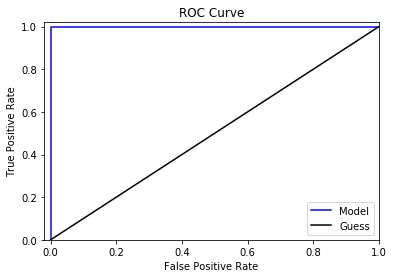

AUC = 1.000



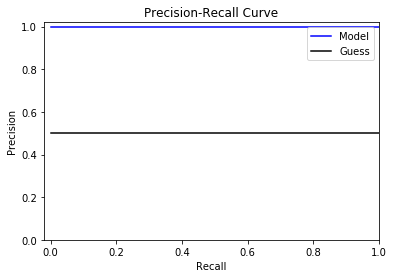

F1 Score = 0.995
MCC = 0.990
AUC for Precision-Recall: 1.000
Average Precision = 1.000


In [31]:
y_prob = model_func.predict(x_test)
y_pred = np.argmax(y_prob,axis=1).reshape(-1,1)
y_prob = y_prob[:,1]
metrics = ModelMetrics(y_test, y_pred, y_prob)
metrics.all_metrics()

## Final Results

The results here slightly outperform the non-resnet NN.


#  Saving and Loading Models 
(and bonus plots)

Once we have models we are happy with, we may save them explicitly. Some useful functions are:

* model.save('model_name.h5') saves to a HDF5 file (should be automatically included in Keras).
* del model # deletes the existing model. Should clear up memory?
* load_model('model_name.h5')

Some comments on clearing the session: from [stackoverflow](https://stackoverflow.com/questions/50895110/what-do-i-need-k-clear-session-and-del-model-for-keras-with-tensorflow-gpu):

> K.clear_session() is useful when you're creating multiple models in succession, such as during hyperparameter search or cross-validation. Each model you train adds nodes (potentially numbering in the thousands) to the graph. TensorFlow executes the entire graph whenever you (or Keras) call tf.Session.run() or tf.Tensor.eval(), so your models will become slower and slower to train, and you may also run out of memory. Clearing the session removes all the nodes left over from previous models, freeing memory and preventing slowdown.

So make sure to save a model *before* clearing its session (or the graph will be gone). 

In [43]:
from keras.models import load_model
import os

from keras.utils import plot_model
import pydot
keras.utils.vis_utils.pydot = pydot


In [32]:
path = './PS7_Keras_Models'
try:  
    os.mkdir(path)
except OSError:  
    print ("Creation of the directory %s failed. Already exists." % path)
else:  
    print ("Successfully created the directory %s " % path)
    
# Save the models
model_seq.save('PS7_Keras_Models/model_seq.h5')  # creates a HDF5 file 
del model_seq  # deletes the existing model

# Save the functional model as well
model_func.save('PS7_Keras_Models/model_func.h5')  
del model_func  


Creation of the directory ./Keras_Models failed


In [44]:
# returns a compiled model
# identical to the previous one
K.clear_session()
model_seq = load_model('PS7_Keras_Models/model_seq.h5')
model_func = load_model('PS7_Keras_Models/model_func.h5')


Seqential Model


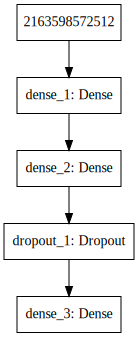

In [48]:
# We can also plot/save the graphs of our models!
plot_model(model_seq, to_file='PS7_Keras_Models/model_seq.png')
plot_model(model_func, to_file='PS7_Keras_Models/model_func.png')

# Display in the notebook
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

print("Seqential Model")
SVG(model_to_dot(model_seq).create(prog='dot', format='svg'))

Residual Model


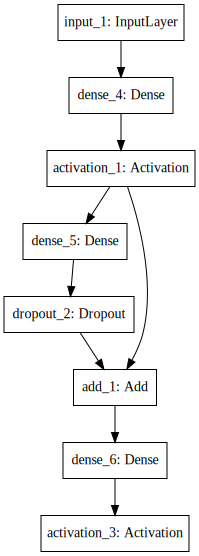

In [52]:
print("Residual Model")
SVG(model_to_dot(model_func).create(prog='dot', format='svg'))